# How to prevent customers from churning?
by Meredith Wang July-15-2022

## 💹 Project Goal

#### - Identify drivers of churn
#### - Make predictions on which custoemrs are at rick of churn
#### - Provide recommendations to help TelcoCo reduce churn rate, increase customer retention, generate higher revenue.

## 📃 Project Description

**Customer churn** is one of the most important metrics for a growing business to evaluate. It's easier to save an existing customer before they leave than to convice them to come back. Understanding and preventing customer churn is critial to company's **long-term success**.

In this project, we will use statistical testing to analyze the key factors of customers who are more likely to churn, develop a classification model to predict churn based on those factors, and provide recommendations for retaining customers as well as predictions of churn for a list of customers (delivered via csv).

## 📝 Initial Questions

## 📂 Data Dictionary

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">Contract Type</span> | 1) Month-to-month 2) One year 3) Two year| This indicates what type of contract the customer has
<span style="background-color: #ffe0bd">Internet Service Type</span> | 1) DSL 2) Fiber Optic 3) None | This indicates what type of internet service the customer has, if any
<span style="background-color: #ffe0bd">Payment Type</span> | 1) Bank transfer 2) Credit card 3) Electronic check 4. Mailed check | This tells us how is the customer paying for the service
<span style="background-color: #ffe0bd">Monthly Charges</span>| Float number| This tells us how much is the customer paying each month
<span style="background-color: #ffe0bd">Teunure</span> | Integer ranging from 0-72 | This shows how long does the customer stay with the company


## 🧮 Wrangle Telco Data

### 1. Data Acquisition 🔍

First, I stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

To acquire the telco data, I used the **telco_churn** database in the mySQL server, and joined the following tables to gather all the customers' information: <u>customers, contract_types, payment_types, internet_service_types </u>

`SELECT 
    *
    FROM
    customers
        JOIN
    contract_types USING (contract_type_id)
        JOIN
    payment_types ON customers.payment_type_id = payment_types.payment_type_id
        JOIN
    internet_service_types ON customers.internet_service_type_id = internet_service_types.internet_service_type_id`


In [2]:
# Getting the data from the mySQL database telco_churn using function from acquire.py
import acquire

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
df = acquire.get_telco_data()

In [3]:
# Checking the shape of our messy dataframe
df.shape

(7043, 26)

### 2. Data Preparation - Data Cleaning 🧹

- **Missing values: null values are dropped** (total_charges)

- **Data types: object is converted to the numeric datatype** (total_charges)

- **Dummy variables: created dummy variables for binary and non-binary categorical variables**

- **Duplicate columns: duplicated columns are dropped** ('contract_type_id', 'internet_service_type_id', 'payment_type_id', 'payment_type_id.1', 'internet_service_type_id', 'internet_service_type_id.1', 'gender_Female', 'partner_No', 'dependents_No', 'phone_service_No', 'multiple_lines_No phone service', 'online_security_No internet service', 'online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'paperless_billing_No', 'churn_No')

In [4]:
# Ignore SettingWithCopyWarning during import
import warnings
warnings.filterwarnings("ignore")

# Cleaning the data using function from prepare.py
import prepare

df = prepare.prep_telco(df)

In [5]:
# Checking the shape of our cleaned dataframe
df.shape

(7032, 51)

In [6]:
# Double check each customer is unique
df.customer_id.nunique()

7032

### 3. Data Preparation - Splitting Data 🗂

In [7]:
# Split the data into train, validate, test using user-defined function from prepare.py

train, validate, test = prepare.split_telco_data(df)

In [8]:
# Checking the size of each dataset

train.shape, validate.shape, test.shape

((4500, 51), (1125, 51), (1407, 51))

- Our data is now split into 3 sampels: **train, validate, test**.
- We can use the train as our in-sample data to explore, fit our ML algorithms, test our model.
- The validate data is used to comfirm out top models is not overfitting, test our top 3 models on unseen data. Using validate performace results, we pick the top **1** model.
- The test (out-of-sample) data is used to estimate how well our top model perform in production, on unseen data in the future.

## 📊 Set the Data Context

**26.6%** of customers churned. We have data from **7032** customers. **16** categorical variables and **3** numerical variables.

In [9]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

# Data handling
import pandas as pd
import numpy as np

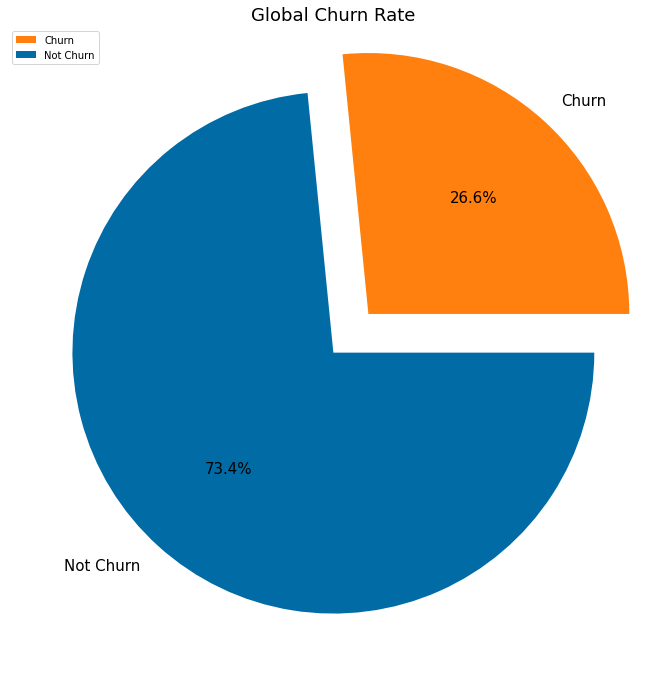

In [10]:
# Calculating global churn
churn_count = df.churn.value_counts()
churn_count

# Visualizing the churn rate
y = np.array([churn_count[1], churn_count[0]])
plt.figure(figsize=(16,12))
mylabels = ["Churn", "Not Churn"]
myexplode = [0.2, 0]
mycolors = ['#ff800e', '#006ba4']
textprops = {"fontsize":15}
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Global Churn Rate',fontsize=18)
plt.show() 

## 👩🏻‍💻 Exploratory Analysis

In [11]:
# Statistic Testing

from scipy import stats

### ❓ Question 1 Which categorical variables are associated with churn?

In [25]:
# Loop through each variable and store the corresponding churn rate

columns = ['gender', 'senior_citizen', 'partner', 'dependents',
           'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing','contract_type', 'payment_type',
       'internet_service_type']
rate = []
for col in columns:
    churn_rate = train.groupby(col).churn_Yes.mean()
    rate.append(churn_rate)

In [26]:
# Import the stored excel file with sorted churn rates
churn = pd.read_excel('churn_rates.xlsx')

In [27]:
churn

variables  churn_rate
0   payment_electronic_check    0.449799
1         senior_citizen_yes    0.431535
2           contract_monthly    0.424729
3       internet_Fiber_optic    0.424442
4         online_security_no    0.424051
5            tech_support_no    0.414667
6           online_backup_no    0.398874
7       device_protection_no    0.391282
8            streaming_tv_no    0.345721
9        streaming_movies_no    0.340125
10     paperless_billing_yes    0.336850
11                partner_no    0.333046
12             dependents_no    0.314304
13      streaming_movies_yes    0.299140
14          streaming_tv_yes    0.293203
15        multiple_lines_yes    0.289404
16         phone_service_yes    0.267945
17                Female        0.265778
18                      Male    0.265778
19         multiple_lines_no    0.249194
20          phone_service_no    0.245370
21         senior_citizen_no    0.234048
22     device_protection_yes    0.230474
23         online_backup_yes    0.220654
24               partner_yes    0.193934
25      payment_mailed_check    0.189372
26              internet_DSL    0.185714
27     payment_bank_transfer    0.170103
28      paperless_billing_no    0.163597
29       payment_credit_card    0.162837
30          tech_support_yes    0.158864
31            dependents_yes    0.152190
32       online_security_yes    0.142308
33         contract_one_year    0.116558
34         contract_two_year    0.028414

In [28]:
top_churn = churn[:8]

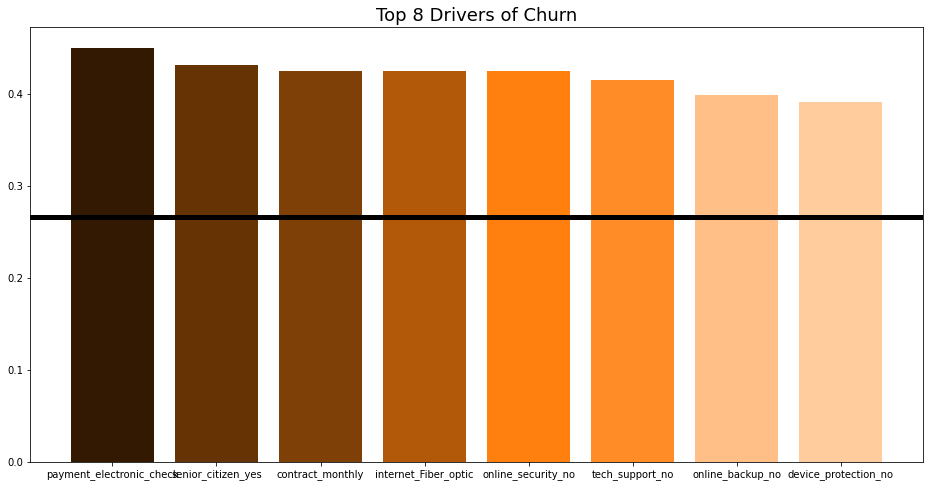

In [29]:
plt.figure(figsize = (16,8))
global_churn = df.churn_Yes.mean()
plt.axhline(y=global_churn, color = '#000000', linewidth = 5)
plt.title('Top 8 Drivers of Churn', fontsize = 18)
colors = ['#331902', '#663305', '#7f4007', '#b25909', '#ff800e', '#ff8c26', '#ffbf86', '#ffcc9e']
plt.bar(top_churn.variables, top_churn.churn_rate, color = colors, data = top_churn)
plt.ylim = (0.2,0.5)

### ✔️ Answer 1: Electronic check, senior citizen, monthly contract type, fiber-optic internet service are the top 4 drivers. Other key drivers to consider: customers without online security, tech support, online backup, device protection

***

### ❓ Question 2: Do customers who churn have higher average monthly charges than those who don't?

In [30]:
# Aggregate dataframe to get the avg monthly charges per tenure for customers who churn vs. not churn

agg_train = train.sort_values(by = 'tenure', ascending = True)
avg_monthly_charges = agg_train.groupby(by = ['churn','tenure']).monthly_charges.mean()
avg_monthly_charges = avg_monthly_charges.reset_index()

In [31]:
# Visualizing avg monthly charges per tenure for customers who churn vs. not churn

color_discrete_map = {'No': '#006ba4', 'Yes':'#ff800e'}
fig = px.bar(
    avg_monthly_charges, 
    x = 'churn',
    y="monthly_charges", 
    animation_frame="tenure", 
    range_y = [0,150],
    color = 'churn',
    color_discrete_map = color_discrete_map,
    title="Monthly Charges per Tenure"
)
fig.update_layout(
  template='ggplot2')

fig.show()

#### Statical Testing - 1 tailed T-Test
- $H_0$ Mean of monthly charges of churned customers <= Mean of monthly charges of not churned customers
- $H_a$ Mean of monthly charges of churned customers > Mean of monthly charges of not churned customers

In [33]:
# We decide on 95% confidence level (alpha = 0.05)
alpha = 0.05

# Check distribution normality
train.churn.value_counts()

No     3304
Yes    1196
Name: churn, dtype: int64

In [34]:
# Calculate t and p statistic

churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

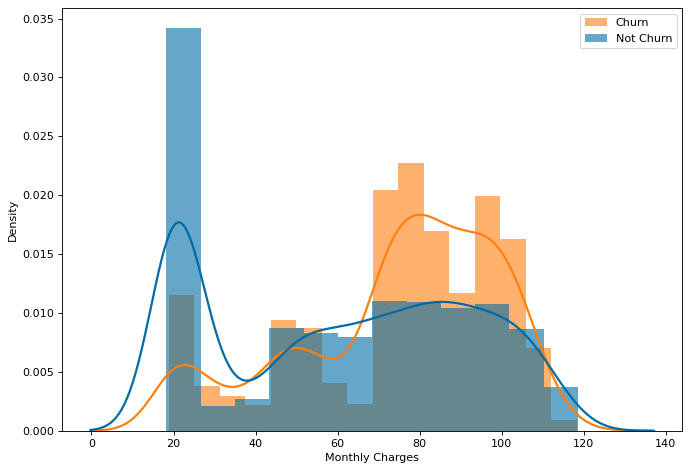

In [35]:
# Visualizing distribution of churn_sample

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(churn_sample, color="#ff800e", label="Churn", **kwargs)
sns.distplot(no_churn_sample, color="#006ba4", label="Not Churn", **kwargs)
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend();

In [36]:
# Check variance of two sample

churn_sample.var(), no_churn_sample.var()

(610.5202363859298, 973.6230640332021)

In [37]:
# Compare t, p/2, alpha value and conclude hypothesis

t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t, p/2, alpha

if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### ✔️ Answer 2: Yes. Customers who churn have a higher average monthly charges than those who don't

***

### ❓ Question 3: Does customers who churn has a shorter tenure on average than those who don't?

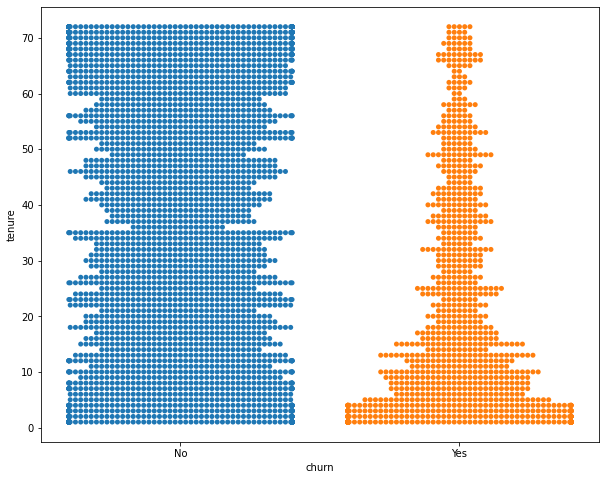

In [38]:
# Visualizing tenure distribution for customers who churn. not churn

plt.figure(figsize=(10,8))
p = sns.swarmplot(
    x="churn",
    y="tenure",
    data=train,
)

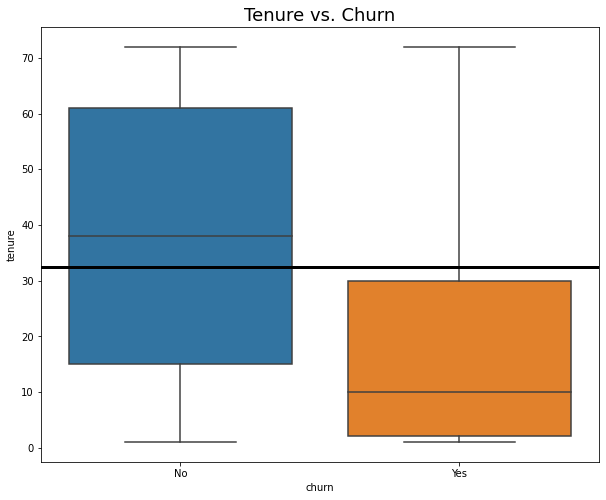

In [41]:
# Visualizing tenure distribution for customers who churn. not churn

plt.figure(figsize=(10,8))
sns.boxplot(x = 'churn', y = 'tenure', data = train)
textprops = {"fontsize":15}
plt.title('Tenure vs. Churn',fontsize=18)
avg_tenure = train.tenure.mean()
plt.axhline(y=avg_tenure, color = '#000000', linewidth = 3)

#### Statical Testing  - T Test
- $H_0$ Tenure of customers who churned >= Tenure of customers who do not churn
- $H_a$ Tenure of customers who churned < Tenure of customers who do not churn

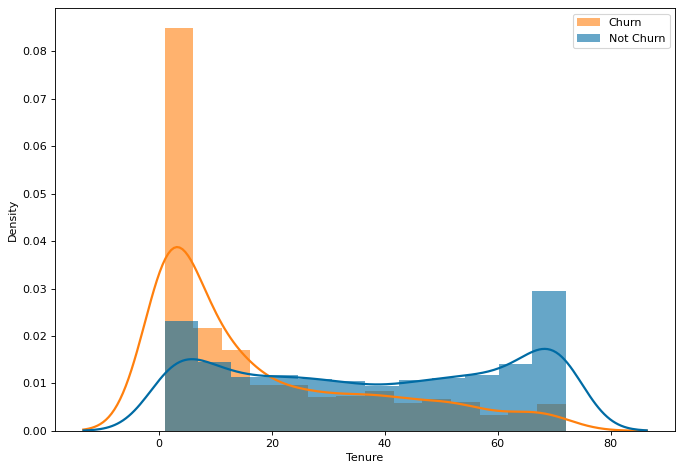

In [42]:
# Visualizing distribution of churn_sample
churn_tenure = train[train['churn']=='Yes'].tenure
no_churn_tenure = train[train['churn']=='No'].tenure
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(churn_tenure, color="#ff800e", label="Churn", **kwargs)
sns.distplot(no_churn_tenure, color="#006ba4", label="Not Churn", **kwargs)
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend();

In [43]:
# Conduct 1-Tailed T Test
t, p = stats.ttest_ind(churn_tenure,no_churn_tenure, equal_var=False)

# Compare t, p/2, alpha value and conclude hypothesis
if p/2 < alpha:
    print("We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that tenure of customers who churned >= tenure of customers who do not churn


### ✔️ Answer 3: Yes. Customers who churn have a shorter tenure on average than those who don't

***

### ❓ Question 4:  Are additional services (tech_support, device_protection, online_security, online_bakcup, streaming_tv, streaming_movies) independent with churn?

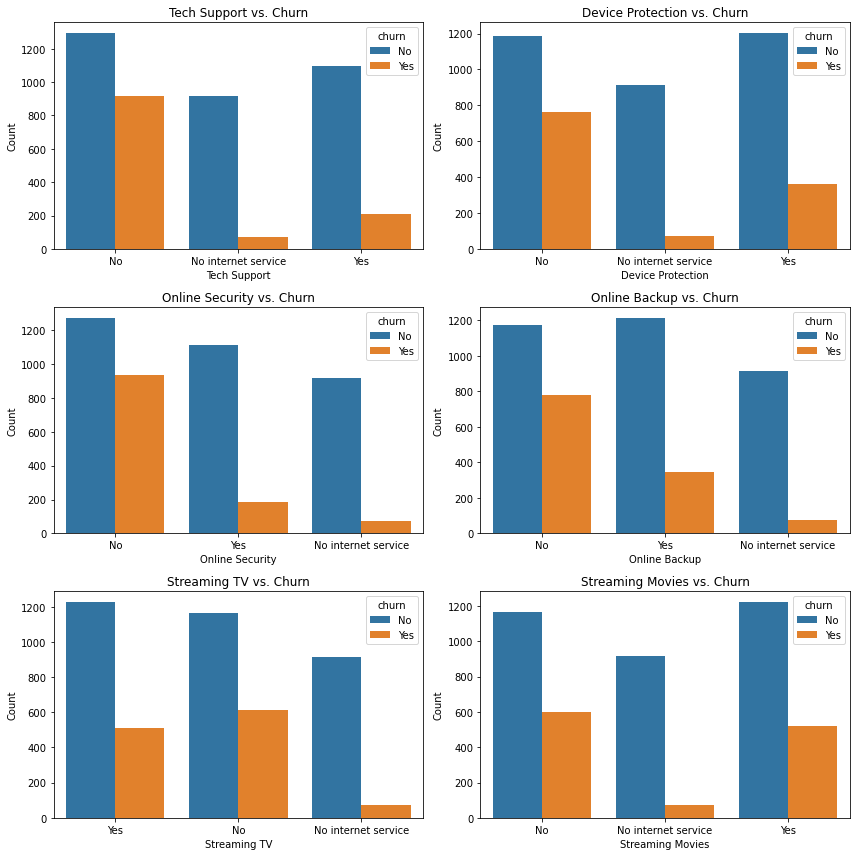

In [44]:
plt.figure(figsize = (12,12))
# subplot 1
plt.subplot(321)
x = train.tech_support
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Tech Support vs. Churn')

# subplot 2
plt.subplot(322)
x = train.device_protection
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.title('Device Protection vs. Churn')

# subplot 3
plt.subplot(323)
x = train.online_security
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.title('Online Security vs. Churn')


# subplot 4
plt.subplot(324)
x = train.online_backup
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.title('Online Backup vs. Churn')

# subplot 5
plt.subplot(325)
x = train.streaming_tv
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.title('Streaming TV vs. Churn')

# subplot 6
plt.subplot(326)
x = train.streaming_movies
sns.countplot(x, data = train, hue = 'churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.title('Streaming Movies vs. Churn')
plt.tight_layout()

#### Statical Testing - Chi$^2$ ($\chi^2$) Test (tech_support)
- $H_0$ Having tech support or not is independent on customers' likelihood to churn
- $H_a$ Having tech support or not is not independent on customers' likelihood to churn

In [45]:
# Creating contingency table

observed = pd.crosstab(train.tech_support, train.churn)
observed

churn                  No  Yes
tech_support                  
No                   1293  916
No internet service   915   73
Yes                  1096  207

In [46]:
# Conduct chi^2 test

chi2, p, dof, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2                 = {chi2:.4f}')
print(f'p                     = {p:.4f}')
print(f'degree of freedom     = {dof}')

Observed

[[1293  916]
 [ 915   73]
 [1096  207]]
---
Expected

[[1621  587]
 [ 725  262]
 [ 956  346]]
---

chi^2                 = 513.7011
p                     = 0.0000
degree of freedom     = 2


In [47]:
# Conclude hypothesis

if p < alpha:
    print("We reject the hypothesis that having tech support or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having tech support or not is independent with customers' likelihood to churn


#### Statical Testing - Chi$^2$ ($\chi^2$) Test (device_protection)
- $H_0$ Having device protection or not is independent on customers' likelihood to churn
- $H_a$ Having device protection or not is not independent on customers' likelihood to churn

In [48]:
# Creating contigency table
observed = pd.crosstab(train['device_protection'], train.churn)

# Conduct chi^2 test and conclude hypothesis
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that having device protection or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having device protection or not is independent with customers' likelihood to churn


#### Statical Testing - Chi$^2$ ($\chi^2$) Test (online_security)
- $H_0$ Having online security or not is independent on customers' likelihood to churn
- $H_a$ Having online security or not is not independent on customers' likelihood to churn

In [49]:
# Creating contigency table
observed = pd.crosstab(train.online_security, train.churn)

# Conduct chi^2 test and conclude hypothesis
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that having online security or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having online security or not is independent with customers' likelihood to churn


#### Statical Testing - Chi$^2$ ($\chi^2$) Test (online_backup)
- $H_0$ Having online backup or not is independent on customers' likelihood to churn
- $H_a$ Having online backup or not is not independent on customers' likelihood to churn

In [50]:
# Creating contigency table
observed = pd.crosstab(train.online_backup, train.churn)

# Conduct chi^2 test and conclude hypothesis
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that having online backup or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having online backup or not is independent with customers' likelihood to churn


#### Statical Testing - Chi$^2$ ($\chi^2$) Test (streaming_tv)
- $H_0$ Having streaming tv service or not is independent on customers' likelihood to churn
- $H_a$ Having streaming tv service or not is not independent on customers' likelihood to churn

In [51]:
# Creating contigency table
observed = pd.crosstab(train.streaming_tv, train.churn)

# Conduct chi^2 test and conclude hypothesis
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that having streaming tv service or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having streaming tv service or not is independent with customers' likelihood to churn


#### Statical Testing - Chi$^2$ ($\chi^2$) Test (streaming_movies)
- $H_0$ Having streaming movies service or not is independent on customers' likelihood to churn
- $H_a$ Having streaming movies service or not is not independent on customers' likelihood to churn

In [52]:
# Creating contigency table
observed = pd.crosstab(train.streaming_movies, train.churn)

# Conduct chi^2 test and conclude hypothesis
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print("We reject the hypothesis that having streaming movies service or not is independent with customers' likelihood to churn")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that having streaming movies service or not is independent with customers' likelihood to churn


### ✔️ Answer 4: All additional services (tech_support, device_protection, online_security, online_bakcup, streaming_tv, streaming_movies) are not independent with customers' churn

## 🔑 Key Takeways from the exploration

- **Top 4 drivers:**
    - electronic payment type
    - sernior citizens
    - month-to-month contract type
    - fiber optic internet service type
    
    
 - Average **monthly charges** is higher for customers who churn
 
 - Average **tenure** is shorter for customers who churn
 
 - Additional services (device protection, online security, online backup, tech support, streaming tv, streaming movies) are dependent on churn
 
 - Features that will be included in models:
     - payment type
     - contract type
     - internet service type
     - monthly charges
     - tenure
     - all additonal services mentioned above

## ⚅ Predicting Churn

### Baseline Prediction

Baseline prediction is set to the mode of train dataset which is **'Not churn'**. Accordingly, baseline accuracy is calculated by predicting all customers do not churn.

In [38]:
# Find the mode of train dataset
train.churn.mode()

0    No
Name: churn, dtype: object

In [53]:
# Mkae baseline prediction as the mode -> 'No'
train['baseline_prediction'] = 'No'

# Calculate baseline prediction accuracy
baseline_accuracy = (train.churn == train.baseline_prediction).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.42%


####  📌 Baseline prediction accuracy (73.42%) gives us a standard to measure our models against.

### 3 Models

Top 3 models are decision tree, random forest, logistic regression classifier. Logistic regression classifier performed the best.

#### 1️⃣ Decision Tree Model

In [61]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [48]:
# split data
columns = ['monthly_charges', 'contract_type_One year',
           'contract_type_Two year', 'internet_service_type_Fiber optic',
           'internet_service_type_DSL','payment_type_Credit card (automatic)',
           'payment_type_Electronic check','payment_type_Mailed check','tenure',
           'online_security_Yes', 'online_security_No',
           'online_backup_Yes', 'online_backup_No',
           'device_protection_Yes', 'device_protection_No',
           'tech_support_Yes', 'tech_support_No',
           'streaming_tv_Yes', 'streaming_tv_No',
          'streaming_movies_Yes', 'streaming_movies_No']
X_train = train[columns]
y_train = train.churn

X_validate = validate[columns]
y_validate = validate.churn

X_test = test[columns]
y_test = test.churn

In [49]:
# Create the tree
tree6 = DecisionTreeClassifier(max_depth=6, random_state=123)

# Fit the model on train
tree6 = tree6.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree6.predict(X_train)

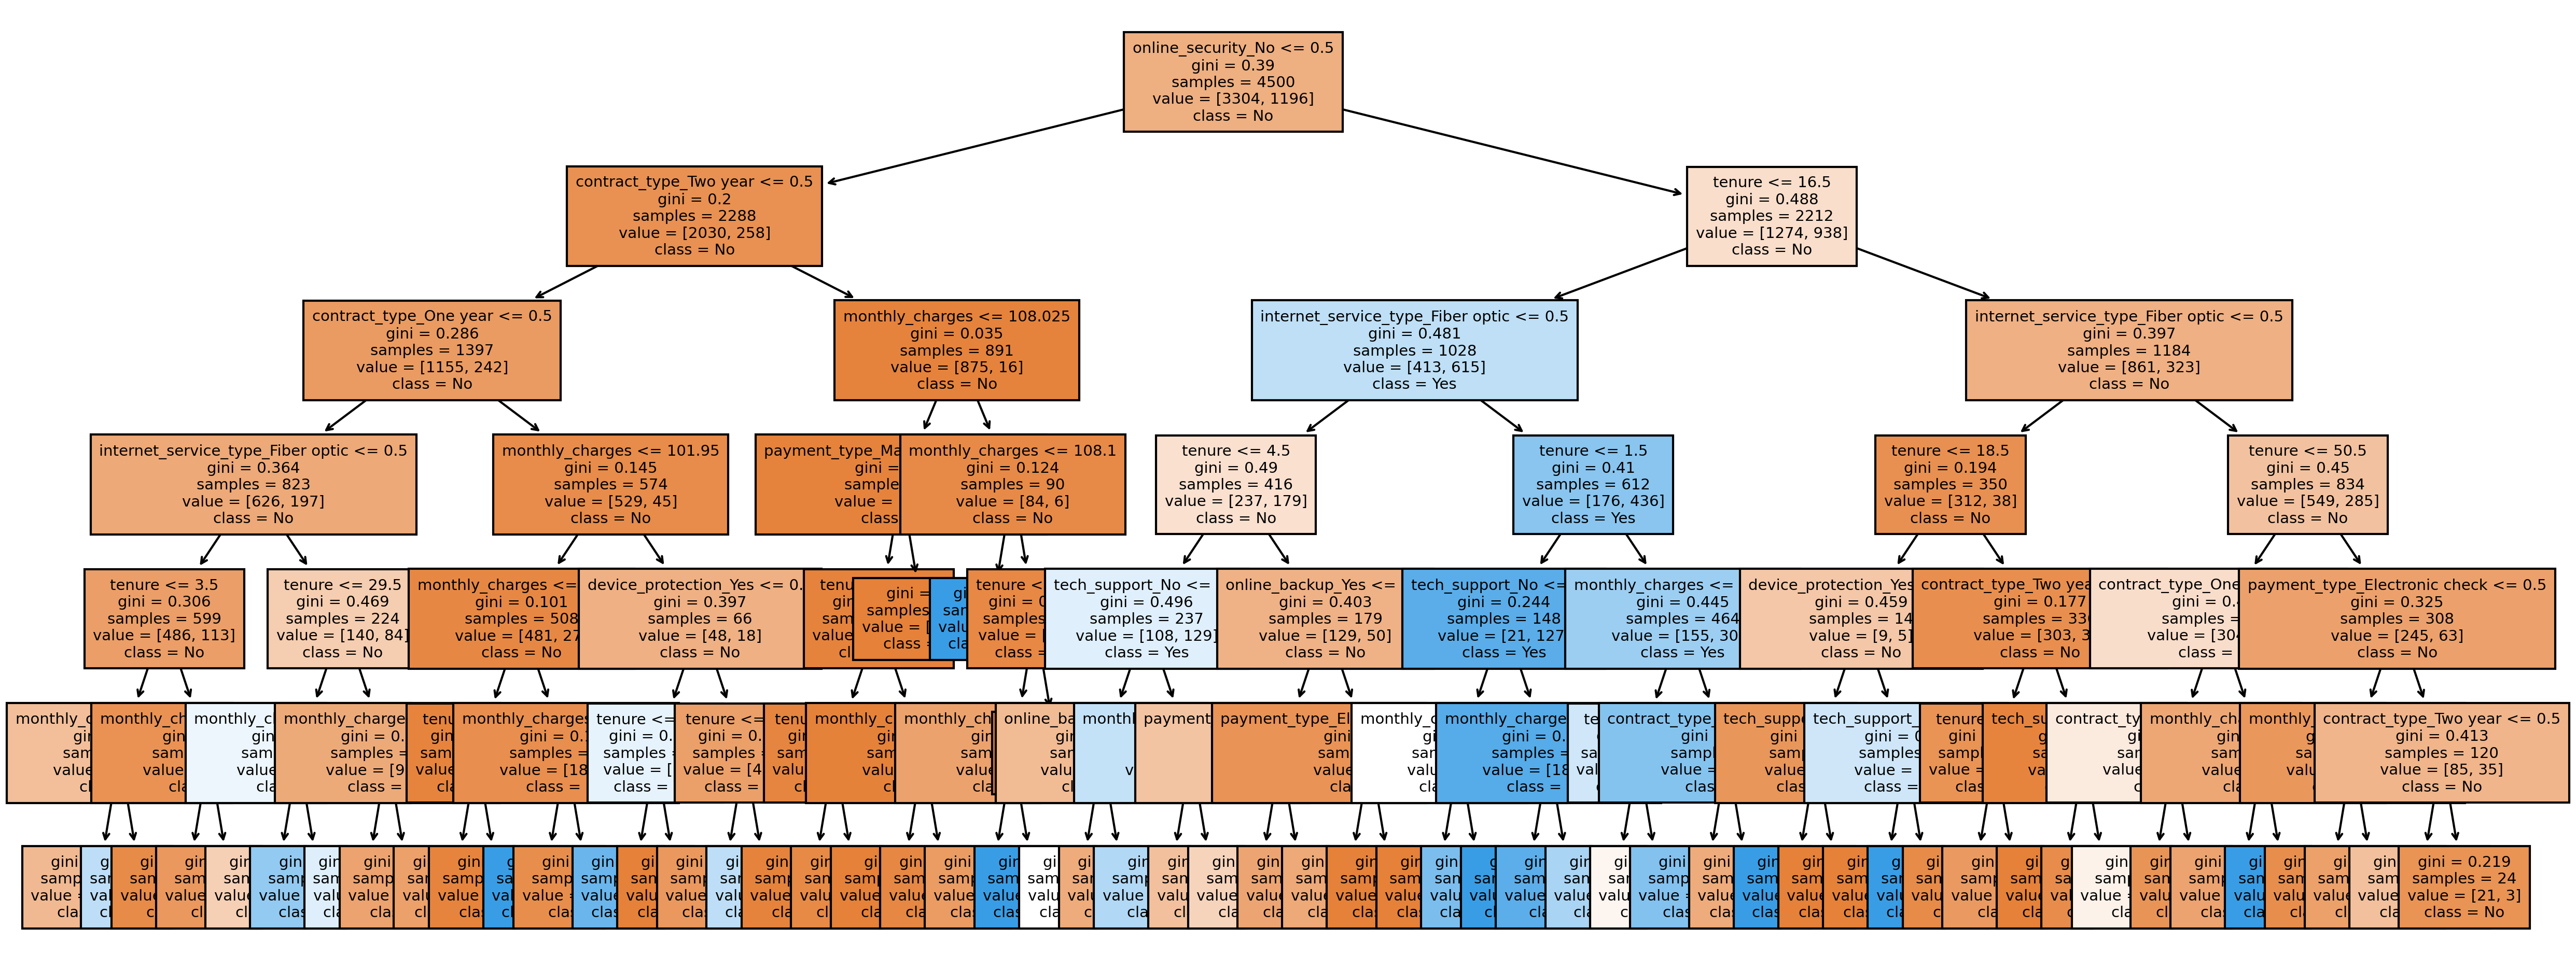

In [51]:
# Visualizing the tree
fig, ax = plt.subplots(figsize=(20,8), dpi = 300)
plot_tree(tree6, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [56]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

          No       0.83      0.93      0.88      3304
         Yes       0.72      0.48      0.58      1196

    accuracy                           0.81      4500
   macro avg       0.77      0.71      0.73      4500
weighted avg       0.80      0.81      0.80      4500



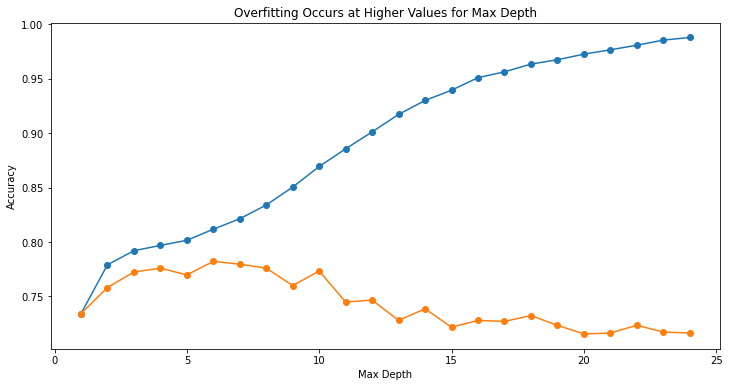

In [198]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [58]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree6.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree6.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.812
Accuracy of Decision Tree classifier on validate set: 0.782


#### 2️⃣ Random Forest Model

In [195]:
# Make the model
forest8 = RandomForestClassifier(max_depth=6, random_state=123)

# Fit the model on train
forest8.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_pred8 = forest8.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred8, output_dict=True)
print("Tree of depth 8")
pd.DataFrame(report)

Tree of depth 8


No          Yes  accuracy    macro avg  weighted avg
precision     0.838328     0.704519  0.812667     0.771424      0.802765
recall        0.922821     0.508361  0.812667     0.715591      0.812667
f1-score      0.878548     0.590578  0.812667     0.734563      0.802012
support    3304.000000  1196.000000  0.812667  4500.000000   4500.000000

In [67]:
print(classification_report(y_train, y_pred8))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      3304
         Yes       0.70      0.51      0.59      1196

    accuracy                           0.81      4500
   macro avg       0.77      0.72      0.73      4500
weighted avg       0.80      0.81      0.80      4500



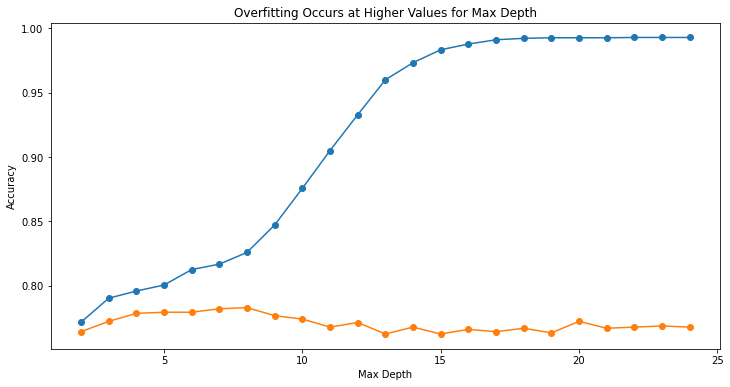

In [199]:
# How is model is created

# loop through max_depth, compare train vs. validate performance
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance, check if there's overfitting

plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [68]:
print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(forest8.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(forest8.score(X_validate, y_validate)))

Accuracy of Random Forest classifier on training set: 0.813
Accuracy of Random Forest classifier on validate set: 0.780


#### 3️⃣ Logistic Regression Model

In [194]:
# Make the model
logit2 = LogisticRegression(random_state = 123, C = 0.01)

# Fit the model on train
logit2.fit(X_train, y_train)

# Use the model
y_pred = logit2.predict(X_train)

# Print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Logistic Regression Classifier, C = 0.01")
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on training set: 0.80
Logistic Regression Classifier, C = 0.01


No          Yes  accuracy    macro avg  weighted avg
precision     0.831342     0.653718  0.795778     0.742530      0.784134
recall        0.905569     0.492475  0.795778     0.699022      0.795778
f1-score      0.866869     0.561755  0.795778     0.714312      0.785777
support    3304.000000  1196.000000  0.795778  4500.000000   4500.000000

In [200]:
# How C is chosen

# create a function first for a single c
def evaluate_model(c):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    accuracy = model.score(X_validate, y_validate)
    coefs = dict(zip(X_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# loop through different c values
models = [evaluate_model(c) for c in [.001, .01, .1, 1, 10, 100, 1000]]


(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of different C values on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

In [70]:
print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(logit2.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(logit2.score(X_validate, y_validate)))

Accuracy of Random Forest classifier on training set: 0.796
Accuracy of Random Forest classifier on validate set: 0.784


#### Evaluate Performance

In [92]:
scores = [['Decision Tree', 'training', 0.812],['Decision Tree', 'validate', 0.782],['Random Forest', 'training', 0.813],['Random Forest', 'validate', 0.780],['Logistic Regression', 'validate', 0.796],['Logistic Regression','training',0.784]]
performance = pd.DataFrame(scores, columns = ['model', 'dataset', 'score'])
performance

model   dataset  score
0        Decision Tree  training  0.812
1        Decision Tree  validate  0.782
2        Random Forest  training  0.813
3        Random Forest  validate  0.780
4  Logistic Regression  validate  0.796
5  Logistic Regression  training  0.784

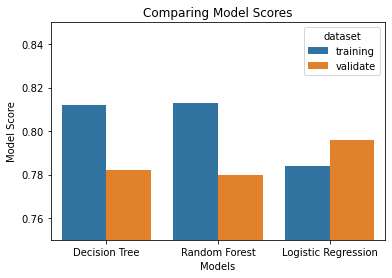

In [95]:
sns.barplot(x='model', y='score',hue = 'dataset', data = performance)
plt.ylim(0.75, 0.85)
plt.xlabel("Models")
plt.ylabel("Model Score")
plt.title("Comparing Model Scores")
plt.show()

#### 📌 None of these models appear to be overfit. The final model that will be used on test dataset is _Model 3: Logistic Regression Classifier_

In [197]:
# Fit the model on test dataset
y_pred = logit2.predict(X_test)

# Print accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_test, y_test)))

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_test, y_pred, output_dict=True)
print("Logistic Regression Classifier, C = 0.01")
pd.DataFrame(report)

Accuracy of Logistic Regression classifier on training set: 0.81
Logistic Regression Classifier, C = 0.01


No         Yes  accuracy    macro avg  weighted avg
precision     0.844062    0.664474  0.805259     0.754268      0.796325
recall        0.901258    0.540107  0.805259     0.720683      0.805259
f1-score      0.871723    0.595870  0.805259     0.733797      0.798397
support    1033.000000  374.000000  0.805259  1407.000000   1407.000000

#### 📌 I expect this model to perform with 81% accuracy in the future on data it has not seen, given no major changes in our data source.

***

## 🔆 Conclusion

### Summary:

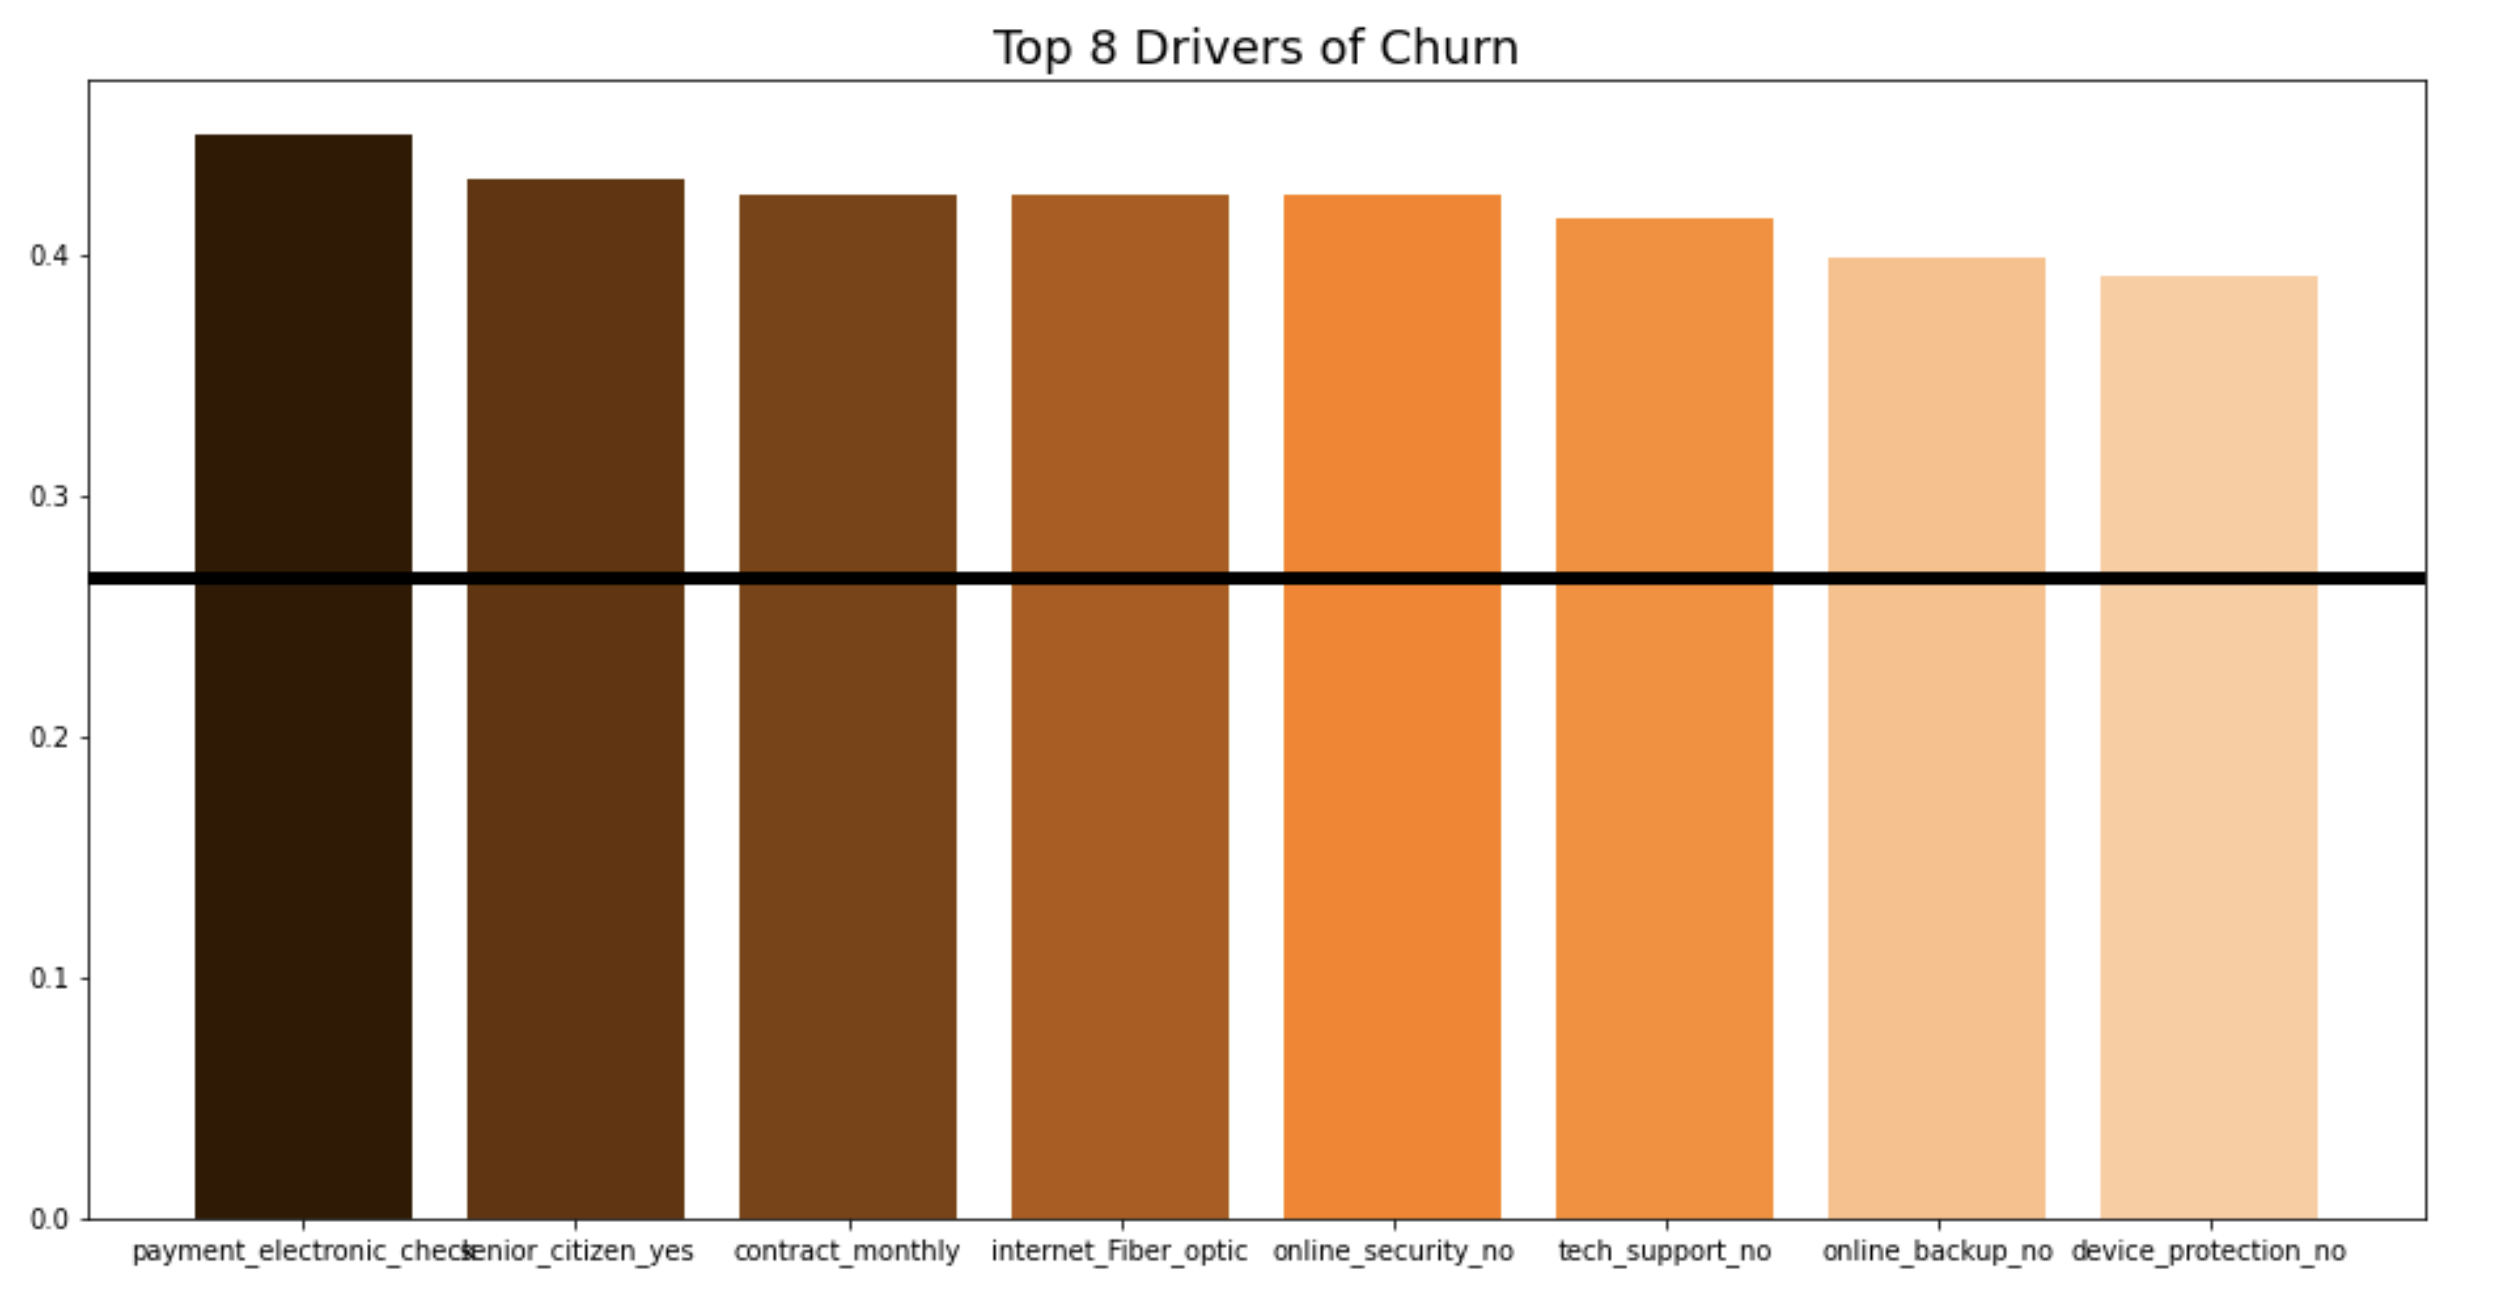
▪️ The top 4 drivers of churn are:
 - electronic payment type
 - sernior citizens
 - month-to-month contract type
 - fiber optic internet service type
    
    
▪️ Average **monthly charges** is higher for customers who churn
 
▪️ Average **tenure** is shorter for customers who churn
 
▪️ Additional services (device protection, online security, online backup, tech support, streaming tv, streaming movies) are dependent on churn

▪️ The meachine learning model: logistic regression classifier is expected to predict churn with **81% accuracy** on future unseen data

### Recommendations:

▪️ Raise price of month-to-month contract type and offer discounts for two-year contract to lead customers towards the other two contract types

▪️ Offer discount on device protection, streaming tv and streaming movies services

▪️ Offer online security, online backup, tech support services for free for one-year and two-year contracts customers

### Next Steps:

▪️ Collect data on customers' **demographic information** (eg. place of residence, socio-economic data such as occupation, household income.)

▪️ Conduct **price discrimination analysis** to further determine the price point for each contract type and service.

## 💬 Connect

If you have questions/concerns regarding this project, please feel free to reach out at:

📧 wang.meredith09@gmail.com

<img align="left" width="14" height="14" src="linkedin%20logo.jpg"> 

https://www.linkedin.com/in/m3redithw/